# Natural Biodiversity Data Science Project

## Scope
The following data science project aims to provide meaningful information about the state of the species present today in national parks. Ansewring the following questions, we aim to provide a strong foundation to preserve and protect endangered species today, while also providing a snapshot of the current state of national parks.
### Questions
1. What endagered species are present today in natural parks?
2. Which species are the most endangered today?
3. What are the most common and least common species found in national parks today?

## Analysis
### Initial Exploratory Analysis

#### Import the libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from scipy.stats import chi2_contingency




#### Load the data

In [3]:
# Load the data
species = pd.read_csv("species_info.csv")
observations = pd.read_csv("observations.csv")

#### Explore the data

In [4]:
# Initial exploratory analysis
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [5]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [6]:
species.describe()

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [7]:
observations.describe()

,observations
count,23296.000000
mean,142.287904
std,69.890532
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


#### Filling Missing Data
Currently, al species that are not endangered have missing values in the species_info.csv. Assuming that this species are not endangered, let's replace al missing values with the 'Least Concern' category used in biology to denote species that do not face inminent extintion danger in any capacity.

In [8]:
# Replace missing values with "Least Concern" in column: 'conservation_status'
species = species.fillna({'conservation_status': "Least Concern"})

### Data Visualization

#### Count of conservation statuses per category
Let's plot the amount of threatened species by category with bar plots.

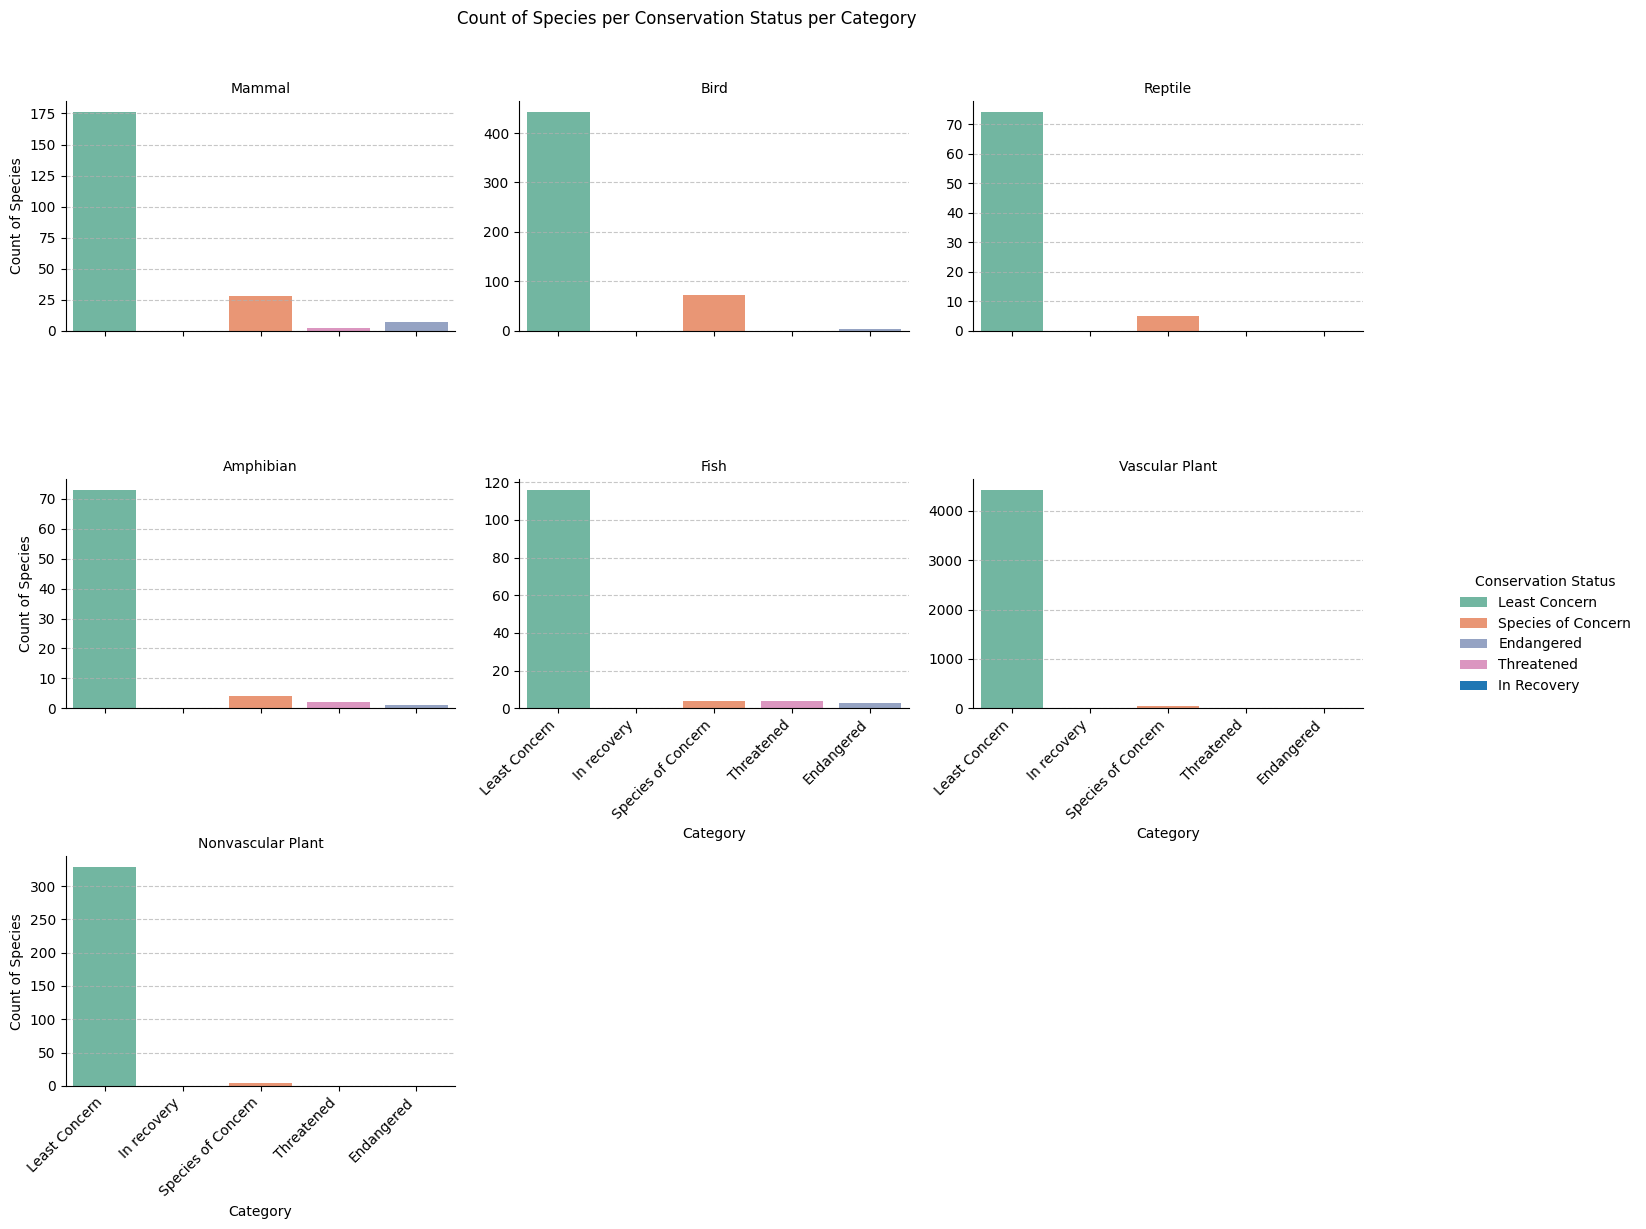

In [9]:
# Recreate the bar plot without the 'Least Concern' category and using Seaborn's Facet Grid

conservation_order = [
    "Least Concern",
    "In recovery",
    "Species of Concern",
    "Threatened",
    "Endangered",
]

# Create a FacetGrid for each category
g = sns.FacetGrid(
    species,
    col="category",
    hue="conservation_status",
    col_wrap=3,
    height=4,
    sharey=False,
    palette="Set2",
)
g.map(
    sns.countplot,
    "conservation_status",
    order=conservation_order,
    hue_order=conservation_order,
)

# Set labels and title
g.set_axis_labels("Category", "Count of Species")
g.set_titles(col_template="{col_name}")
plt.suptitle("Count of Species per Conservation Status per Category", y=1.02)
# Add legend manually if needed
g.add_legend(title="Conservation Status", bbox_to_anchor=(1.05, 0.5), loc="center left")

# Set Y-axis to logarithmic scale
# g.set(yscale="log")

for ax in g.axes.flat:
    ax.set_xticks(range(len(conservation_order)))
    ax.set_xticklabels(conservation_order, rotation=45, ha="right")

# Add lines between bars
for ax in g.axes.flat:
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Increase space between rows
plt.tight_layout()

# Show the plots
plt.show()

The Least Concern category is quite numerous. Let's ignore it so we can focus on the other Conservation Status and their differences.

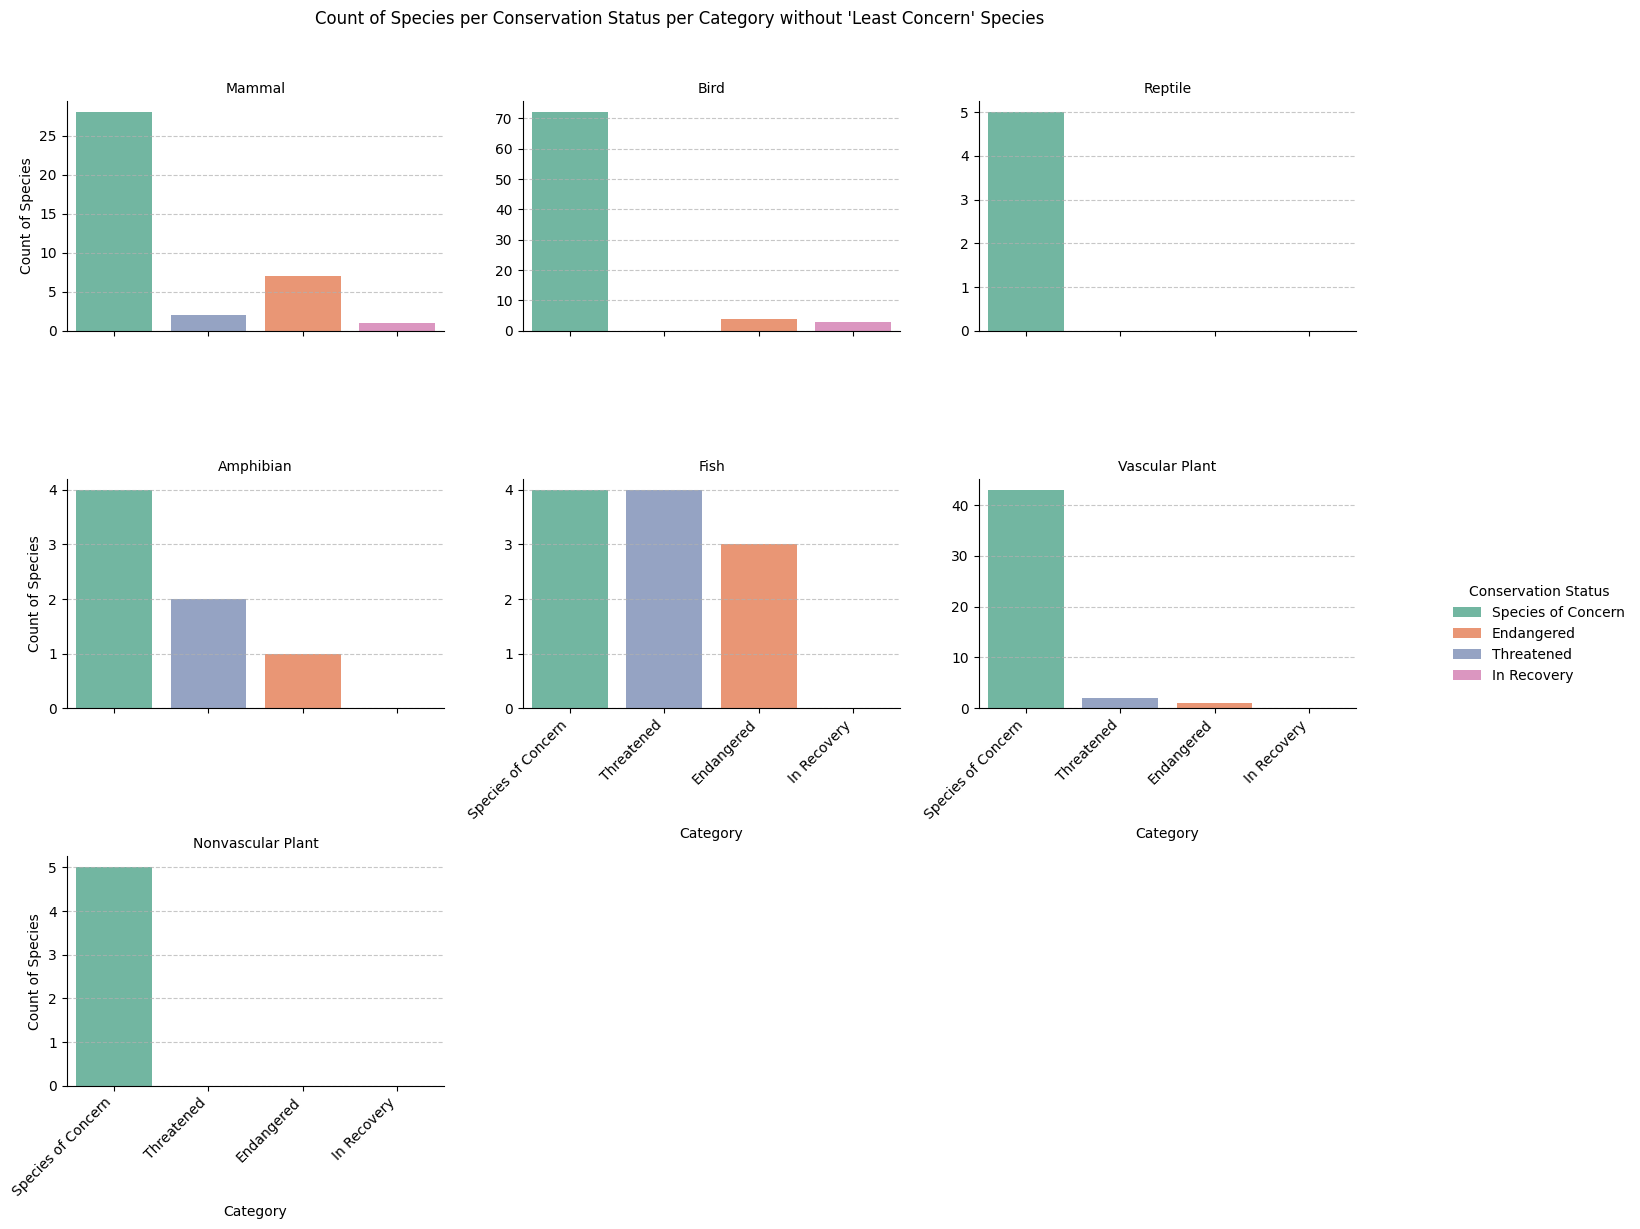

In [10]:
# Recreate the bar plot without the 'Least Concern' category and using Seaborn's Facet Grid

# Create a new list for the bar and hue order without 'Least Concern'
conservation_order = [
    "Species of Concern",
    "Threatened",
    "Endangered",
    "In Recovery",
]

# Create a new data frame without the 'Least Concern' conservation status
species_no_least_concern = species[(species["conservation_status"] != "Least Concern")]

# Create a FacetGrid for each category
g = sns.FacetGrid(
    species_no_least_concern,
    col="category",
    hue="conservation_status",
    col_wrap=3,
    height=4,
    sharey=False,
    palette="Set2",
)
g.map(
    sns.countplot,
    "conservation_status",
    order=conservation_order,
    hue_order=conservation_order,
)

# Set labels and title
g.set_axis_labels("Category", "Count of Species")
g.set_titles(col_template="{col_name}")
plt.suptitle(
    "Count of Species per Conservation Status per Category without 'Least Concern' Species",
    y=1.02,
)
# Add legend manually if needed
g.add_legend(title="Conservation Status", bbox_to_anchor=(1.05, 0.5), loc="center left")

# Set the x_ticks and labels
for ax in g.axes.flat:
    ax.set_xticks(range(len(conservation_order)))
    ax.set_xticklabels(conservation_order, rotation=45, ha="right")

# Add lines between bars
for ax in g.axes.flat:
    ax.grid(axis="y", linestyle="--", alpha=0.7)

# Increase space between rows
plt.tight_layout()

# Show the plots
plt.show()

We got a sense of what is the distribution of conservation species across classes of living beings.
Now, lets compare the proportion of "At risk" and "Secure" conservation status.
- Secure
1. Least Concern
2. In recovery
- At risk
1. Species of Concern
2. Threatened
3. Endangered

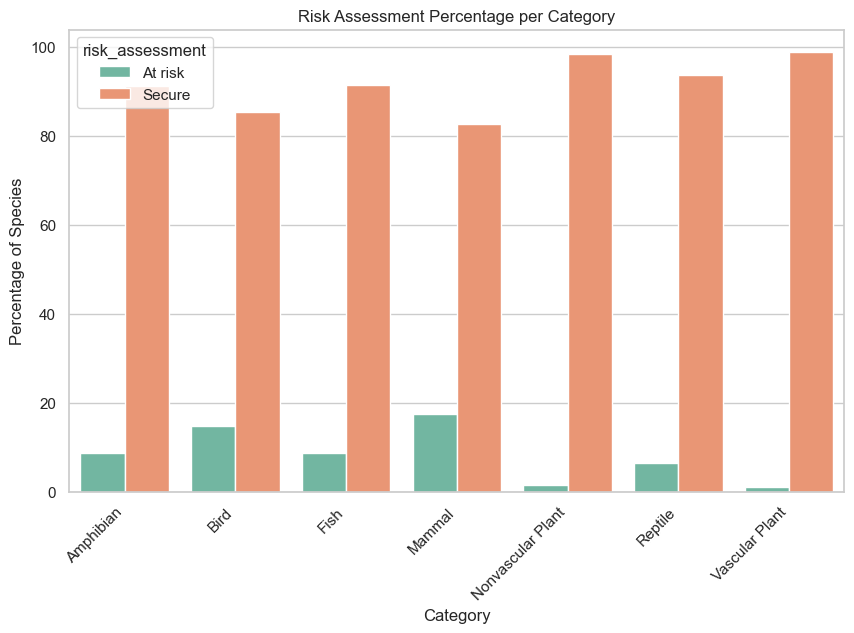

In [11]:
# Map conservation statuses to new categories
status_mapping = {
    "Least Concern": "Secure",
    "In recovery": "Secure",
    "Species of Concern": "At risk",
    "Threatened": "At risk",
    "Endangered": "At risk",
}

# Create a new column called 'risk_assessment' and apply a mapping
species["risk_assessment"] = species["conservation_status"].map(status_mapping)

# Create a new data frame that reflects the count of species at risk per category
category_risk = (
    species.groupby(["category", "risk_assessment"])
    .agg(count=("risk_assessment", "count"))
    .reset_index()
)

# Calculate the total count for each category
total_count_per_category = category_risk.groupby("category")["count"].transform("sum")

# Create a new column with the percentage
category_risk["percentage"] = (category_risk["count"] / total_count_per_category) * 100

# Use Seaborn's barplot for visualization
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(data=category_risk, x="category", y="percentage", hue="risk_assessment", palette="Set2")


# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Add labels and title if needed
plt.xlabel('Category')
plt.ylabel('Percentage of Species')
plt.title('Risk Assessment Percentage per Category')

# Show the plot
plt.show()


Let's try to make a grouped bar that shows all of the conservation statuses per category.

The bar for Vascular Plants' Least Concern species is too numerous and eclipses the other data. Lets show the data in percentages of the total of rows per category.

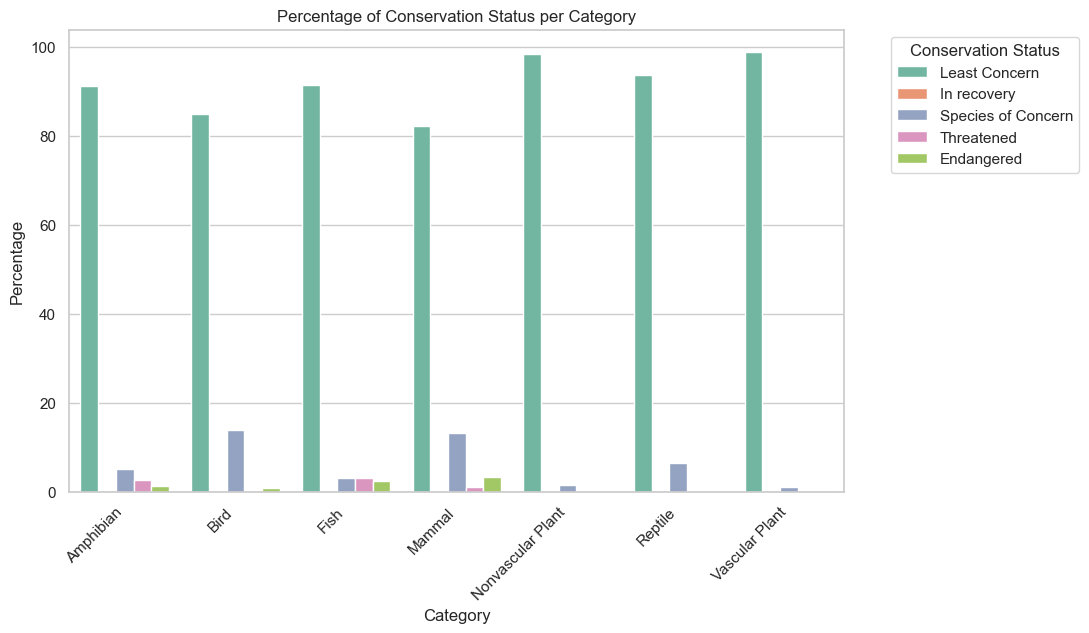

In [12]:
# Get the unique conservation statuses and define the desired order
unique_statuses = species['conservation_status'].unique()
order = ['Least Concern', 'In recovery', 'Species of Concern', 'Threatened', 'Endangered']


# Calculate the percentage of each conservation status per category
percentage_df = species.groupby(['category', 'conservation_status']).size() / species.groupby('category').size() * 100
percentage_df = percentage_df.reset_index(name='percentage')

# Plotting with Seaborn using the specified order
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(x="category", y="percentage", hue="conservation_status", data=percentage_df, palette="Set2", hue_order=order)

# Set labels and title
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Percentage of Conservation Status per Category')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Add legend
plt.legend(title='Conservation Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the figure
plt.savefig('output_plots/Percentage_conservation_status_per_category.png')

# Show the plot
plt.show()

### Statistics Analysis
#### Chi2 test for Conservation Status per Category
This test is designed to check if there is a significant difference in the risk assessment distribution per category. In other words, it gives an answer if one of the categories, for example, "birds", has a higher proportion of species being at risk than the rest.

In [13]:
# Create a contingency table for the chi-square test
contingency_table = category_risk.pivot(index='category', columns='risk_assessment', values='count').fillna(0)

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Output the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

# Interpret the results
alpha = 0.05
if p < alpha:
    print("The difference in counts between 'at risk' and 'secure' is statistically significant.")
else:
    print("The difference in counts between 'at risk' and 'secure' is not statistically significant.")


Chi-square statistic: 450.172367415504
P-value: 4.5064962077974853e-94
The difference in counts between 'at risk' and 'secure' is statistically significant.


##### Chi-square result
According to this test, the difference in counts between 'at risk' and 'secure' is statistically significant

In [14]:
import pandas as pd
from scipy.stats import chi2_contingency
from itertools import combinations

# Assuming category_risk is your original DataFrame

# Create a contingency table for each category
categories = category_risk["category"].unique()

# Create an empty list to store chi-squared results
chi2_result = pd.DataFrame(
    columns=["Category_1", "Category_2", "Chi2", "P-value", "Significant"]
)

# Set the alpha for statistical analysis
alpha = 0.05

# Perform paired chi-squared tests:
for first, second in combinations(categories, 2):
    # Filter data for the two categories
    category_data = category_risk[
        (category_risk["category"] == first)
        | (category_risk["category"] == second)
    ]

    # Extract the relevant columns
    index = category_data["category"]
    columns = category_data["risk_assessment"]
    values = category_data["count"]

    # Create a contingency table
    contingency_table = pd.crosstab(
        index=index, columns=columns, values=values, aggfunc="sum"
    )

    # Perform the chi-squared test
    chi2, p, _, _ = chi2_contingency(contingency_table)

    # Check if the result is statistically significant
    is_significant = p < alpha

    # Append results to the significant_results DataFrame
    new_result = [first, second, chi2, p, is_significant]
    chi2_result.loc[len(chi2_result)] = new_result

chi2_result


,Category_1,Category_2,Chi2,P-value,Significant
0,Amphibian,Bird,1.567800,2.105268e-01,False
1,Amphibian,Fish,0.000000,1.000000e+00,False
2,Amphibian,Mammal,2.744969,9.756100e-02,False
3,Amphibian,Nonvascular Plant,9.581127,1.965877e-03,True
4,Amphibian,Reptile,0.077047,7.813397e-01,False
5,Amphibian,Vascular Plant,34.265490,4.808330e-09,True
6,Bird,Fish,2.663452,1.026777e-01,False
7,Bird,Mammal,0.647521,4.210005e-01,False
8,Bird,Nonvascular Plant,39.309487,3.616798e-10,True
9,Bird,Reptile,3.387960,6.567416e-02,False


#### Paired Chi-squared test results
The results of the paired chi-squared tests indicate whether there are significant differences in the distribution of risk assessments between different categories. Let's break down the interpretation based on the columns:

1. **Category_1 and Category_2**: These columns represent the pairs of categories for which the chi-squared tests were conducted.

2. **Chi2 (Chi-squared statistic)**: This value measures the difference between the expected and observed frequencies in the contingency table. Larger values indicate greater dissimilarity between the observed and expected distributions.

3. **P-value**: This is the probability of observing a chi-squared statistic as extreme as the one computed, assuming that the null hypothesis is true (i.e., there is no significant difference between the categories). A small p-value (typically < 0.05) suggests that you can reject the null hypothesis.

4. **Significant**: This column indicates whether the test is statistically significant based on the chosen significance level (alpha = 0.05). If True, it suggests that there is a significant difference in risk assessments between the categories.

Now, let's interpret some examples from your results:

- Row 3 (Amphibian vs. Mammal): The p-value is 0.097561, which is greater than 0.05. Therefore, you would not reject the null hypothesis, suggesting no significant difference in risk assessments between Amphibians and Mammals.

- Row 11 (Fish vs. Mammal): The p-value is 0.038445, which is less than 0.05. In this case, you would reject the null hypothesis, indicating a significant difference in risk assessments between Fish and Mammals.

- Row 16 (Mammal vs. Reptile): The p-value is 0.027744, which is less than 0.05. You would reject the null hypothesis, suggesting a significant difference in risk assessments between Mammals and Reptiles.

- Row 20 (Nonvascular Plant vs. Vascular Plant): The p-value is 0.593134, which is greater than 0.05. No significant difference is found between Nonvascular Plants and Vascular Plants in terms of risk assessments.

In summary, you can use the p-value to determine whether the differences in risk assessments between the categories are statistically significant. If the p-value is less than your chosen significance level (alpha), you would reject the null hypothesis and conclude that there is a significant difference. Otherwise, you would fail to reject the null hypothesis.

### Species and Observations Table Join

In [15]:
species_observations = pd.merge(species, observations, on="scientific_name", how='inner')
species_observations

,category,scientific_name,common_names,conservation_status,risk_assessment,park_name,observations
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Least Concern,Secure,Bryce National Park,130
1,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Least Concern,Secure,Yellowstone National Park,270
2,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Least Concern,Secure,Great Smoky Mountains National Park,98
3,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Least Concern,Secure,Yosemite National Park,117
4,Mammal,Bos bison,"American Bison, Bison",Least Concern,Secure,Yosemite National Park,128
...,...,...,...,...,...,...,...
25627,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",Least Concern,Secure,Yellowstone National Park,237
25628,Vascular Plant,Tribulus terrestris,"Bullhead, Caltrop, Goathead, Mexican Sandbur, ...",Least Concern,Secure,Great Smoky Mountains National Park,50
25629,Vascular Plant,Tribulus terrestris,"Bullhead, Caltrop, Goathead, Mexican Sandbur, ...",Least Concern,Secure,Yellowstone National Park,239
25630,Vascular Plant,Tribulus terrestris,"Bullhead, Caltrop, Goathead, Mexican Sandbur, ...",Least Concern,Secure,Bryce National Park,111


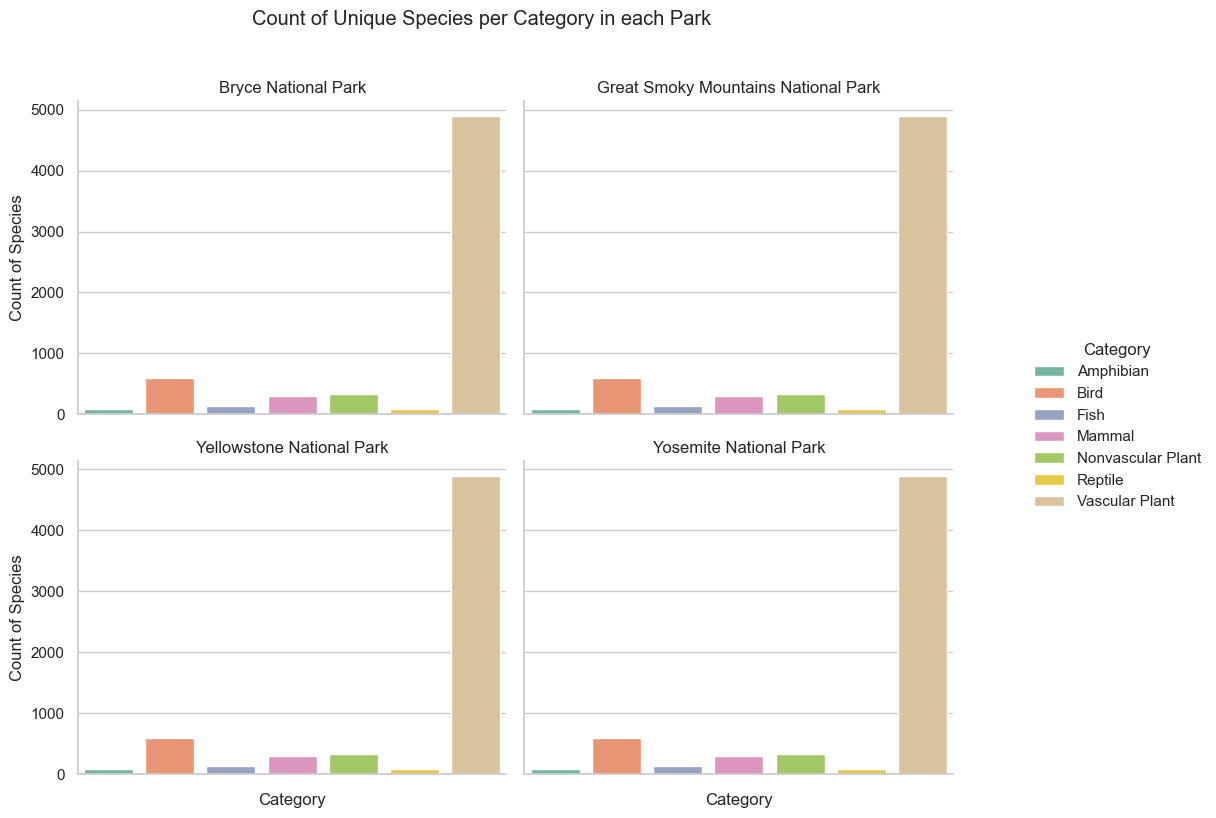

In [28]:
# Group data per park_name, category and aggregate the count of species
category_count_per_park = species_observations.groupby(['park_name', 'category']).agg(scientific_name_count=('scientific_name', 'count')).reset_index()

# Create a FacetGrid
g = sns.FacetGrid(
    category_count_per_park,
    col='park_name',
    hue='category',
    col_wrap=2,
    height=4,
    palette='Set2',
)
# Create a barplot in each of the tiles of the grid
g.map_dataframe(sns.barplot, x='category', y='scientific_name_count')

# Set labels and title
g.set_axis_labels("Category", "Count of Species")
g.set_titles(col_template="{col_name}")
plt.suptitle("Count of Unique Species per Category in each Park", y=1.02)

# Add legend manually if needed
g.add_legend(title="Category", bbox_to_anchor=(1.05, 0.5), loc="center left")

# Set explicit ticks and rotate x-axis labels
for ax in g.axes.flat:
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


# Increase space between rows
plt.tight_layout()

# Show the plots
plt.show()

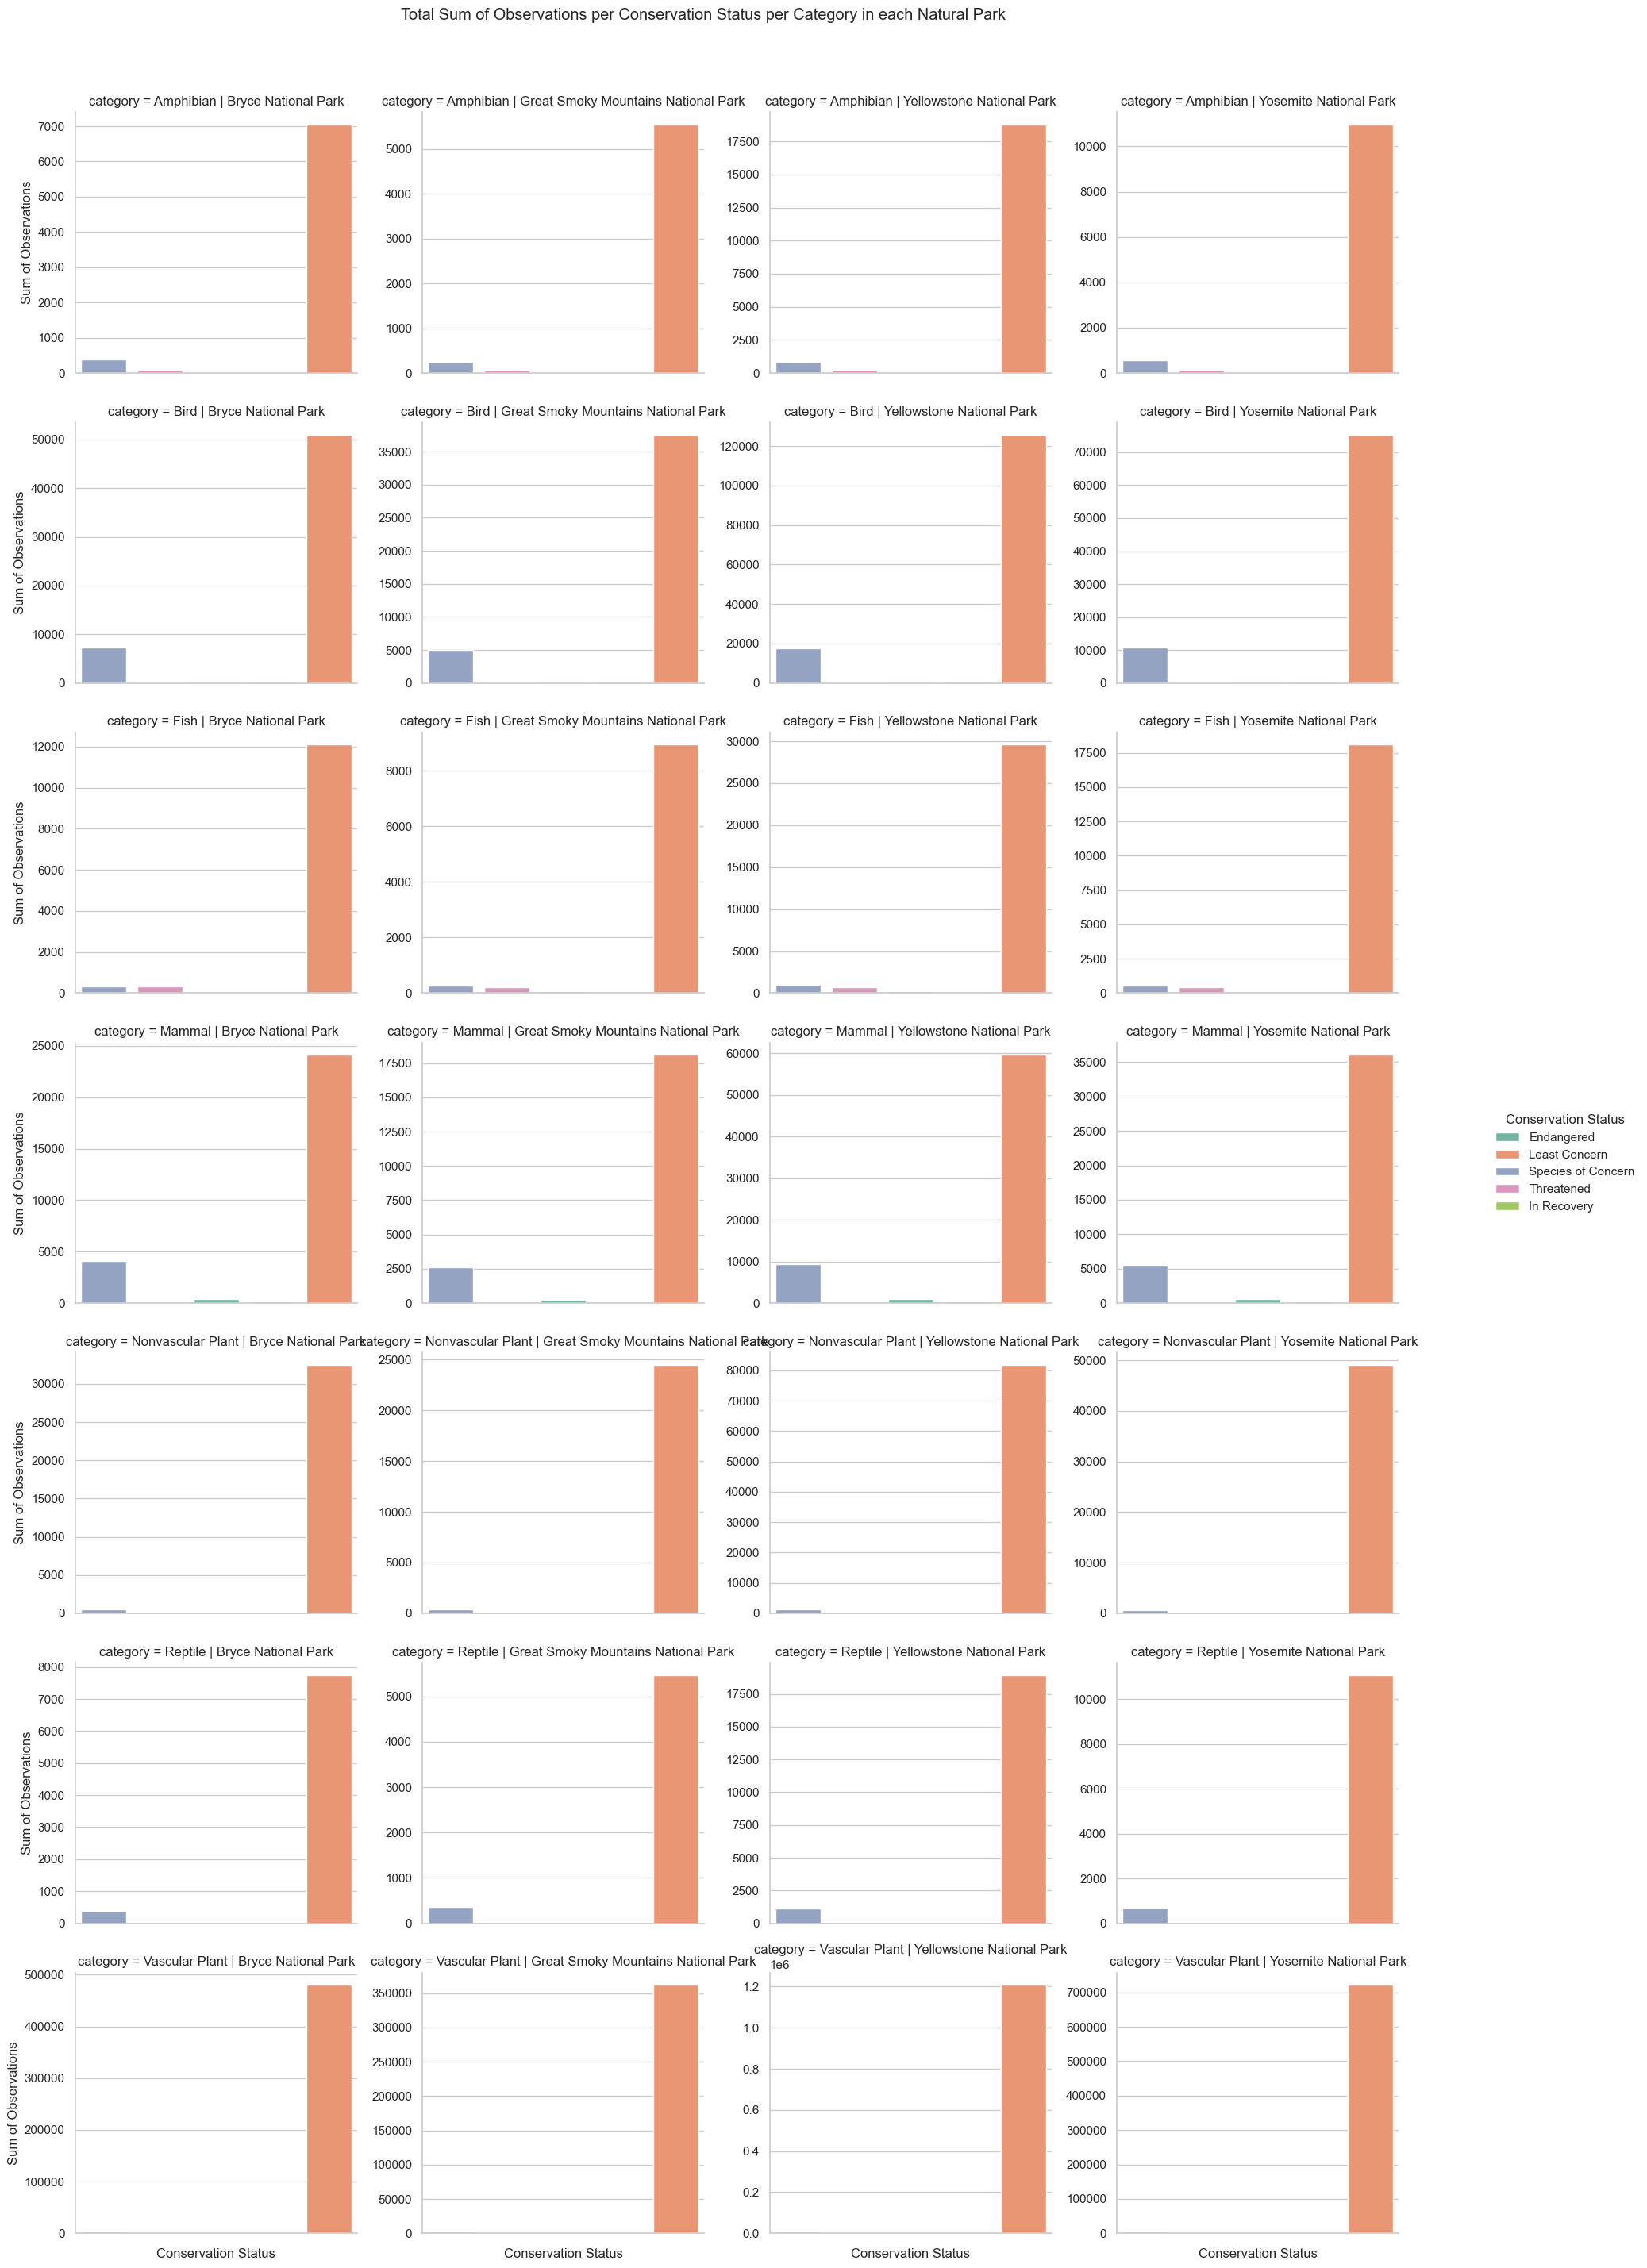

In [48]:
# Create a new list for the bar and hue order
conservation_order = [
    "Species of Concern",
    "Threatened",
    "Endangered",
    "In Recovery",
    "Least Concern"
]

# Create a DataFrame that groups data per park_name, category and conservation_status, while aggregating the data to show the sum of observations per row
observations_per_category_per_park = (
    species_observations.groupby(["park_name", "category", "conservation_status"])
    .agg(observations_sum=("observations", "sum"))
    .reset_index()
)

# Create a FacetGrid to show all of the data of the DataFrame
g = sns.FacetGrid(
    data=observations_per_category_per_park,
    col="park_name",
    row="category",
    hue="conservation_status",
    height=4,
    palette="Set2",
    sharey=False
)
# Create a barplot in each one of the tiles of the grid
g.map_dataframe(sns.barplot, x="conservation_status", y="observations_sum", order=conservation_order)

# Set labels and title
g.set_axis_labels("Conservation Status", "Sum of Observations")
g.set_titles(col_template="{col_name}")
plt.suptitle(
    "Total Sum of Observations per Conservation Status per Category in each Natural Park",
    y=1.02,
)

# Add legend manually if needed
g.add_legend(title="Conservation Status", bbox_to_anchor=(1.05, 0.5), loc="center left")

# Set explicit ticks and rotate x-axis labels
for ax in g.axes.flat:
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


# Increase space between rows
plt.tight_layout()

# Show the plots
plt.show()

Filtering out the 'Least Concern' conservation status again to show the other data better.

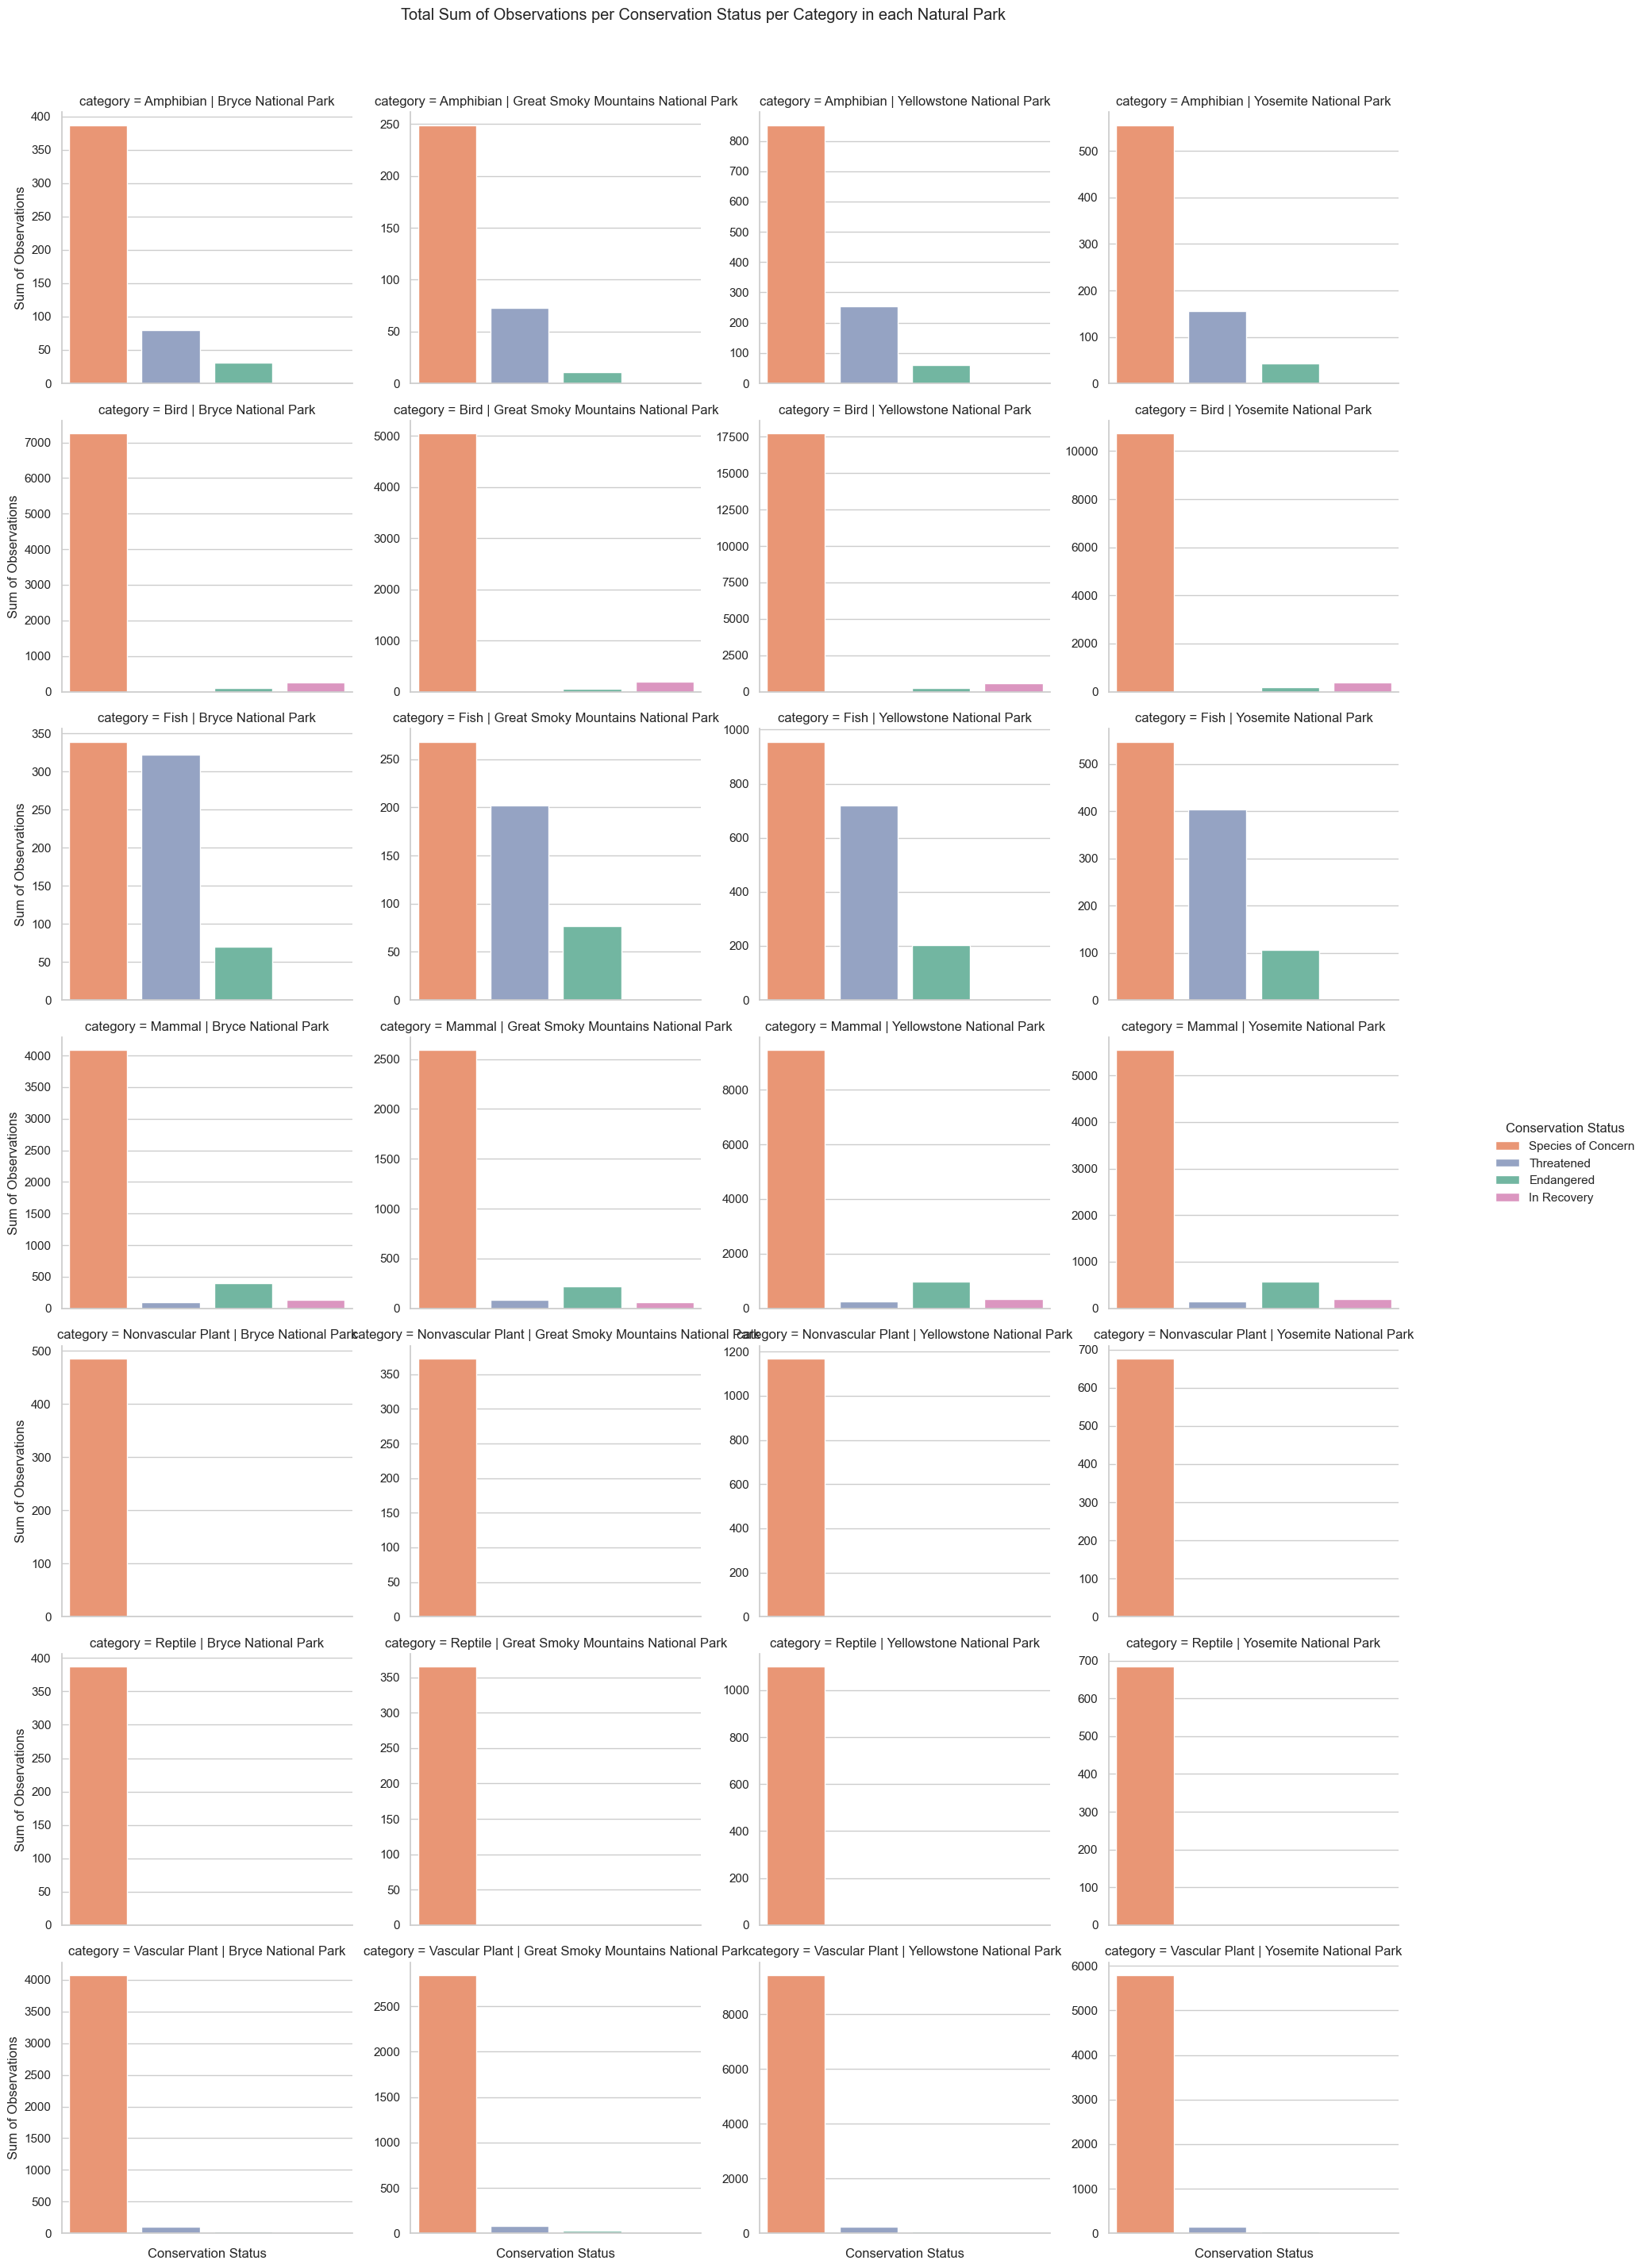

In [53]:
# Create a new list for the bar and hue order omitting the Least Concern value
conservation_order = [
    "Species of Concern",
    "Threatened",
    "Endangered",
    "In Recovery",
]

# Filter out rows with 'Least Concern' conservation_status
observations_per_category_per_park_filtered = observations_per_category_per_park[
    observations_per_category_per_park["conservation_status"] != "Least Concern"
]

# Create a FacetGrid to show all of the data of the DataFrame
g = sns.FacetGrid(
    data=observations_per_category_per_park_filtered,
    col="park_name",
    row="category",
    hue="conservation_status",
    height=4,
    palette="Set2",
    sharey=False
)
# Create a barplot in each one of the tiles of the grid
g.map_dataframe(sns.barplot, x="conservation_status", y="observations_sum", order=conservation_order)

# Set labels and title
g.set_axis_labels("Conservation Status", "Sum of Observations")
g.set_titles(col_template="{col_name}")
plt.suptitle(
    "Total Sum of Observations per Conservation Status per Category in each Natural Park omitting Least Concern",
    y=1.02,
)

# Add legend manually if needed
g.add_legend(title="Conservation Status", bbox_to_anchor=(1.05, 0.5), loc="center left", label_order=conservation_order)

# Set explicit ticks and rotate x-axis labels
for ax in g.axes.flat:
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Increase space between rows
plt.tight_layout()

# Show the plots
plt.show()
